In [141]:
function f(x, t)
    return x
end


function euler_step(f, x0, tn, h, arg...)

    xn1 = x0 + h*f(x0, tn)
    tn1 = tn + h

    return [xn1,tn1]
end


function rk4_step(f, x0, tn, h, arg...)

    k1 = h * f(x0, tn, arg...)
    k2 = h * f((x0 .+ h./2), (tn .+ k1./2), arg...)
    k3 = h * f((x0 .+ h./2), (tn .+ k2./2), arg...)
    k4 = h * f((x0 .+ h), (tn .+ k3), arg...)

    xn1 = x0 + (k1 .+ 2*k2 .+ 2*k3 .+ k4)./6
    tn1 = tn + h

    return [xn1, tn1]
end


function solve_to(f, x0, t1, t2, deltat_max, method, arg...)

    timesteps = floor((t2 - t1) / deltat_max)

    x = x0
    t = t1
    for i = 1:timesteps+1
        x, t = method(f, x, t, deltat_max, arg...)
        println(x, "   ", t)
    end

    if t != t2
        h = t2 - t
        x, t = method(f, x, t, h, arg...)
    end

    return x
end


function solve_ode(f, x0, t, method, deltat_max, arg...)

    x_series = Any[x0]
    x = x0
    for i = 1:(length(t)-1)
        
        x = solve_to(f, x, t[i], t[i + 1], deltat_max, method)
        push!(x_series, x)

    end

    return x_series
end


solve_to(f, 1, 0.9, 1, 0.01, rk4_step)

1.01005   0.91
1.0202004999999998   0.92
1.0304525049999997   0.93
1.0408070300499996   0.9400000000000001
1.0512651003504996   0.9500000000000001
1.0618277513540046   0.9600000000000001
1.0724960288675447   0.9700000000000001
1.0832709891562202   0.9800000000000001
1.0941536990477825   0.9900000000000001
1.1051452360382603   1.0


1.1051452360382603

In [ ]:
println(solve_to(f, 1, 0, 0, 0.0001, rk4_step))
println(solve_to(f, 1, 0, 0, 0.0001, rk4_step))


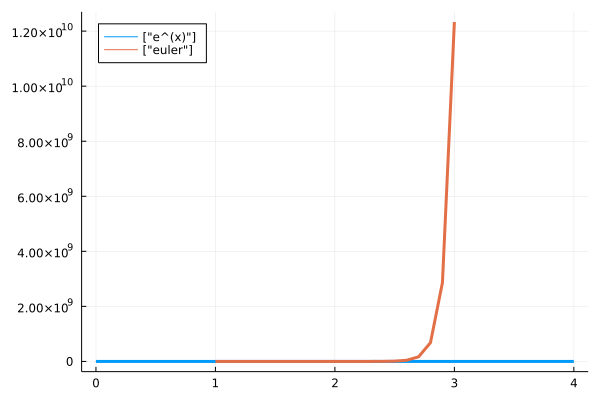

In [114]:
using Plots
t = 1:0.1:3
sol(t) = exp.(t)
s2 = solve_ode(f, 1, t, euler_step, 0.001)
# s3 = solve_ode(f, 1, t, rk4_step, 0.1)

plot(sol, 0, 4, label = ["e^(x)"], lw = 3, legend=:topleft)
plot!(t, s2, label = ["euler"], lw = 3)
# plot!(t, s3, label = ["rk4"], lw = 3)

In [ ]:
xaxis=:log, yaxis=:log